<a href="https://colab.research.google.com/github/Nedddddy/STAT3009/blob/main/STAT3009_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUHK-STAT3009**: Homework 3 - Neural Network in RS: Models, Algorithm, and virtualization (**due Dec 04**)

## **Q1: Data preprocessing**

In [ ]:
## use iris dataset in Q1
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)

### **Q1.1**
- Standardize features by removing the mean and scaling to unit variance.
- Merge `data.data` and `data.target` as a one `dataframe` with columns: [`sepal length (cm)`,	`sepal width (cm)`, `petal length (cm)`, `petal width (cm)`, `target`]
- Compute the target-specific mean of each features, that is,

              sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
      target
      0                   5.006             3.428              1.462             0.246
      1                   5.936             2.770              4.260             1.326
      2                   6.588             2.974              5.552             2.026

In [ ]:
## Your solution to Q1.1 here

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [ ]:
print(data.data.sample(5).T)

                    59   88   79   76   29
sepal length (cm)  5.2  5.6  5.7  6.8  4.7
sepal width (cm)   2.7  3.0  2.6  2.8  3.2
petal length (cm)  3.9  4.1  3.5  4.8  1.6
petal width (cm)   1.4  1.3  1.0  1.4  0.2


In [ ]:
data.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X, y = data.data.values, data.target.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


df = pd.concat([pd.DataFrame(X, columns=data.feature_names),
                pd.DataFrame(y, columns=['target'])], axis=1)

result = df.groupby('target').mean()
print(result)

        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0               -1.014579          0.853263          -1.304987   
1                0.112282         -0.661432           0.285324   
2                0.902297         -0.191831           1.019663   

        petal width (cm)  
target                    
0              -1.254893  
1               0.166734  
2               1.088159  


### **Q1.2**

- Using `seaborn` to show the `Violinplot` of all features against `target`
- Using `seaborn` to show the `heatmap` of the correlation between all features

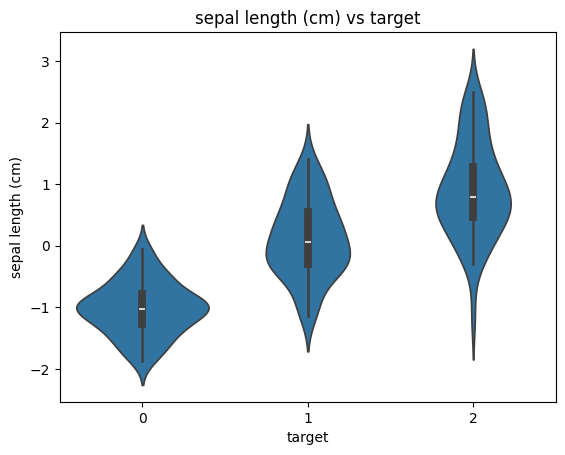

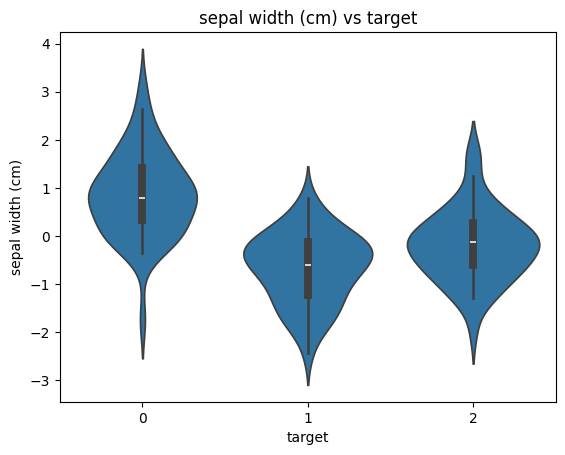

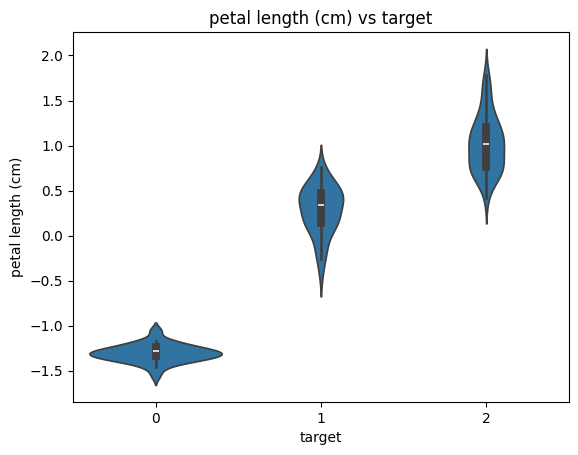

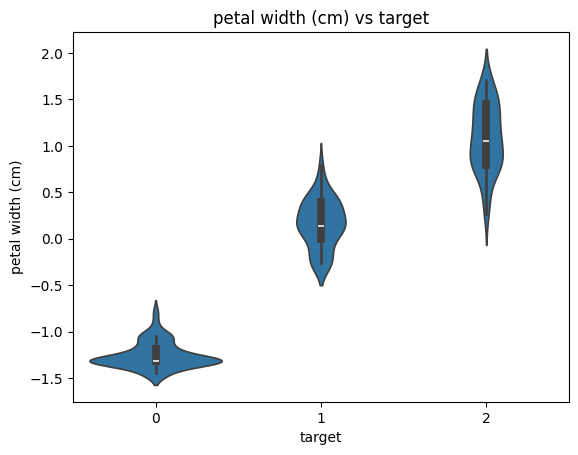

In [ ]:
## Your solution to Q1.2 here

import seaborn as sns
import matplotlib.pyplot as plt

for col in data.feature_names:
    sns.violinplot(x='target', y=col, data=df)
    plt.title(f'{col} vs target')
    plt.show()

<Axes: >

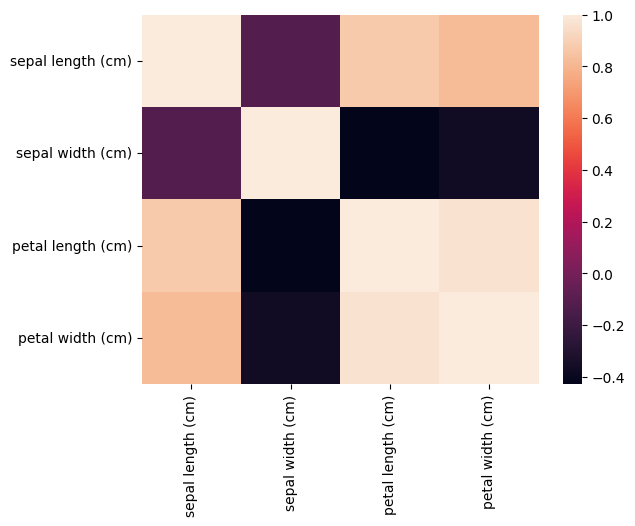

In [ ]:
sns.heatmap(df[data.feature_names].corr())

## **Q2. Semi-parametric model**

A semi-parametric model is widely used in statistical learning, machine learning, and deep learning. Given a feature-vector $\mathbf{x}$, the outcome is formulated as:
$$
f(\mathbf{x}) = \mathbf{\beta}^\intercal \mathbf{x} + h(\mathbf{x}),
$$
where $\mathbf{\beta}$ is a linear coefficient, and $h(\cdot)$ is a nonlinear function. In this question, you are expected to use $f(\mathbf{x})$ to make prediction in `California Housing dataset` based on `tensorflow`

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### **Q2.1**

- Standardize features of by removing the mean and scaling to unit variance.
- Using `tensorflow` build up a network for the model $f(\mathbf{x})$ with $h(\mathbf{x})$ as two `Dense` layers: `Dense(8, activation='relu')` + `Dense(1, activation='linear')`
- Print `model.summary()` for your model

In [ ]:
## Your solution to Q2.1 here

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from tensorflow import keras
from keras.layers import Dense

class semiNet(keras.Model):

  def __init__(self):
    super().__init__()
    self.densebeta = Dense(units=1, activation='linear')
    self.dense1 = Dense(units=8, activation='relu')
    self.dense2 = Dense(units=1, activation='linear')


  def call(self, inputs):
    ## inputs -> outputs
    # linbeta panel
    up = self.densebeta(inputs) # beta^T * x

    # low panel
    low = self.dense1(inputs)
    low = self.dense2(low)

    # out
    out = up + low
    return out

In [ ]:
## compile model
## opt: SGD
## Loss: MAE
## Metrics: RMSE and MAPE

test_semiNet = semiNet()

# opt
opt = keras.optimizers.SGD(1e-4)

test_semiNet.compile(optimizer=opt,
                  loss='mean_squared_error',
                  metrics=['root_mean_squared_error',
                       'mean_absolute_error'])

In [ ]:
test_semiNet.fit(x=X_train,
              y=y_train,
              batch_size=64,
              epochs=20)

Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5982 - mean_absolute_error: 2.4457 - root_mean_squared_error: 2.9320
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.6964 - mean_absolute_error: 2.0631 - root_mean_squared_error: 2.5870
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1461 - mean_absolute_error: 1.7849 - root_mean_squared_error: 2.2683
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0740 - mean_absolute_error: 1.5590 - root_mean_squared_error: 2.0183
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4109 - mean_absolute_error: 1.3979 - root_mean_squared_error: 1.8467
Epoch 6/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8731 - mean_absolute_error: 1.2648 - root_mean_squared_error: 1.6949
Epoch 7/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4747 - mean_absolute_error: 1.1694 - root_mean_squared_error: 1.5730
Epoch 8/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1560 - mean_absolute_

In [ ]:
test_semiNet.summary()

Model: "semi_net_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92 (372.00 B)

 Trainable params: 90 (360.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### **Q2.2**

- Compile the model with `loss`: [MAE](https://keras.io/api/losses/regression_losses/#meanabsoluteerror-class); `optimizer`: [SGD](https://keras.io/api/optimizers/sgd/); and monitoring `Metrics`: `RMSE`

- fit model
  - using `X_train`, `y_train`
  - taking 20% of data as validation set
  - [earlystopping](https://keras.io/api/callbacks/) based on `RMSE` on `validation set` with custom `patience` and other hyperparamters

- Make prediction to `X_test`, and evaluate the prediction by reporting `RMSE` and `MAE`.

In [ ]:
## Your solution to Q2.2 here

## compile model
## opt: SGD
## Loss: MAE
## Metrics: RMSE and MAPE

test_model = semiNet()

# opt
opt = keras.optimizers.SGD(1e-4)

test_model.compile(optimizer=opt,
                  loss='mean_absolute_error',
                  metrics=['root_mean_squared_error','mean_absolute_error'])

from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_root_mean_squared_error',
                   restore_best_weights=True)

test_model.fit(x=X_train,
               y=y_train,
               batch_size=64,
               epochs=20,
               validation_split=0.2,
               callbacks=[es])

Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6392 - mean_absolute_error: 2.6392 - root_mean_squared_error: 3.2939 - val_loss: 2.6102 - val_mean_absolute_error: 2.6102 - val_root_mean_squared_error: 3.1473
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5667 - mean_absolute_error: 2.5667 - root_mean_squared_error: 3.0557 - val_loss: 2.5618 - val_mean_absolute_error: 2.5618 - val_root_mean_squared_error: 3.1031
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5471 - mean_absolute_error: 2.5471 - root_mean_squared_error: 3.1953 - val_loss: 2.5139 - val_mean_absolute_error: 2.5139 - val_root_mean_squared_error: 3.0596
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4949 - mean_absolute_error: 2.4949 - root_mean_squared_error: 3.2072 - val_loss: 2.4667 - val_mean_absolute_error: 2.4667 - val_root_mean_squared_error: 3.0168
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4403 - mean_absolute_error: 2.4403 - root_mean_squ

In [ ]:
y_pred = test_model.predict(X_test)
y_pred = y_pred.flatten()
test_model.evaluate(X_test, y_test)

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8013 - mean_absolute_error: 1.8013 - root_mean_squared_error: 2.2846


[1.8113818168640137, 2.305269241333008, 1.8113818168640137]

## **Q3: Implementing a Custom Recommender System using TensorFlow**

**Recommender System Model:**

The goal of this question is to implement a custom recommender system model using TensorFlow. The model is defined as follows:

$$\widehat{r}_{ui} = \mathbf{p}_u^\intercal \mathbf{q}_i + b_i + \mathbf{p}_u^\intercal \mathbf{p}_u + a_u$$

where:

* $\widehat{r}_{ui}$ is the predicted rating for user $u$ and item $i$
* $\mathbf{p}_u$ is the user latent factor vector
* $\mathbf{q}_i$ is the item latent factor vector
* $b_i$ is the item bias term
* $a_u$ is the user bias term

**Your Task:**

Implement this model using TensorFlow on our course dataset. You will need to:

1. Load the dataset and preprocess the data as needed
2. Define the model architecture using TensorFlow
3. Implement the loss function and optimizer
4. Train the model on the dataset
5. Evaluate the performance of the model using a `Acc`.

**Note:** You can use TensorFlow's built-in functions and modules to implement the model. Note that the prediction result is not of importance; this question only assesses your implementation.

In [ ]:
import numpy as np

def Acc(true_rating, pred_rating):
  return np.mean(true_rating == pred_rating)

In [ ]:
## Dowload binary dataset in CUHK-STAT3009 Github repo
import pandas as pd

train_url = "https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/b-rs/train.csv"
test_url = "https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/b-rs/test.csv"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

y_train = np.array(train['rating'].values, dtype=float)
X_train = train[['user_id', 'movie_id']].values

y_test = np.array(test['rating'].values, dtype=float)
X_test = test[['user_id', 'movie_id']].values

n_user = max( max(X_train[:,0]), max(X_test[:,0]) ) + 1
n_item = max( max(X_train[:,1]), max(X_test[:,1]) ) + 1

In [ ]:
## Your solution to Q3 here

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

class CNMF(keras.Model):
  def __init__(self, num_user, num_item, K=10):
    super().__init__()
    ## layers
    self.user_embed = layers.Embedding(input_dim=num_user,
                                       output_dim=K)
    self.item_embed = layers.Embedding(input_dim=num_item,
                                       output_dim=K)
    self.user_bias = layers.Embedding(input_dim=num_user,
                                       output_dim=1)
    self.item_bias = layers.Embedding(input_dim=num_item,
                                       output_dim=1)
    self.dot = layers.Dot(axes=1)
    # Specify the axis to sum over

  def call(self, inputs):
    # pu: B x r
    user_vec = self.user_embed(inputs[:,0])
    # qi: B x r
    item_vec = self.item_embed(inputs[:,1])
    # au: B x 1
    user_const = self.user_bias(inputs[:,0])
    # bi: B x 1
    item_const = self.item_bias(inputs[:,1])

    ## pu^T q_i + au + bi
    out = self.dot([user_vec, item_vec]) + self.dot([user_vec, user_vec]) + user_const + item_const

    return out

In [ ]:
model = CNMF(num_user=n_user, num_item=n_item)

opt = keras.optimizers.Adam(1e-3)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['root_mean_squared_error'])

## callback
callback = [keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True,
)]

## fit with early stopping
model.fit(x=X_train,
             y=y_train,
             epochs=20,
             batch_size=512,
             validation_split=0.3,
             callbacks=callback
             )

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5429 - root_mean_squared_error: 0.7367 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6613
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4048 - root_mean_squared_error: 0.6361 - val_loss: 0.3278 - val_root_mean_squared_error: 0.5725
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3007 - root_mean_squared_error: 0.5482 - val_loss: 0.2697 - val_root_mean_squared_error: 0.5193
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2432 - root_mean_squared_error: 0.4931 - val_loss: 0.2428 - val_root_mean_squared_error: 0.4928
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2146 - root_mean_squared_error: 0.4632 - val_loss: 0.2297 - val_root_mean_squared_error: 0.4793
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1987 - root_mean_squared_error: 0.4458 - val_loss: 0.2226 - val_root_mean_squared_error: 0.4718
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1877

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
result = Acc(y_test, y_pred)
print(result)

1599/1599 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
0.5160442120597974
